# Settings

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Reshape
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot
%matplotlib inline

# Read dataset

In [2]:
df = pd.read_csv('../RNN_data_version1.csv')
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head(20)

In [ ]:
df.shape

# Make data ready for input

This data has 1181 samples with for every sample 5 timesteps. Every timestep has 19 different numerical features.

Use normalisation of range (0,1) to counter for vanishing gradient problem and other advantages.

In [3]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

# Split into train and test set
#dataset = df.iloc[:,:].values
rand_split = np.random.rand(len(dataset))
train_list = rand_split < 0.8
#val_list = (rand_split >= 0.8) & (rand_split < 0.9)
test_list = rand_split >= 0.8

train = dataset[train_list]
#data_val = dataset[val_list]
test = dataset[test_list]

# split into input and output
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1], test[:,-1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 5, 19))
test_X = test_X.reshape((test_X.shape[0], 5, 19))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(955, 5, 19) (955,) (226, 5, 19) (226,)


# Train model

Many-to-one LSTM recurrent neural network with 32 neurons, dropout of 20% for regularization and adam optimizer.

### Long Short-Term Memory (LSTM) network

This following figure shows the operations of an LSTM-cell.

<img src="images/lstm.png" style="width:700px;height:300px;">

In [4]:
# function to create model for kerasClassifier
def create_model(dropout_rate, neurons):
    from keras.models import Sequential
    from keras.layers import Reshape
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout
    model = Sequential()
    #model.add(Reshape((5,19), input_shape=(95,)))
    model.add(LSTM(units=neurons, input_shape=(5, 19), dropout=dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

# create model
def train_model():
    from keras.wrappers.scikit_learn import KerasRegressor
    model = KerasRegressor(build_fn=create_model, verbose=0)
    
    # define the grid search parameters
    batch_size = [64]
    epochs = [128, 256]
    dropout_rate = [0.0, 0.1, 0.2]
    neurons = [64, 128, 256]
    param_grid = dict(batch_size=batch_size, epochs=epochs, dropout_rate=dropout_rate, neurons=neurons)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(train_X, train_y)
    return grid_result
    
results = train_model()


Using TensorFlow backend.


In [5]:
print("Best: %f using %s" % (results.best_score_, results.best_params_))
means = results.cv_results_['mean_test_score']
stds = results.cv_results_['std_test_score']
params = results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.010838 using {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 128, 'neurons': 64}
-0.010838 (0.002485) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 128, 'neurons': 64}
-0.011371 (0.002415) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 128, 'neurons': 128}
-0.011640 (0.003055) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 128, 'neurons': 256}
-0.012413 (0.002882) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 256, 'neurons': 64}
-0.014066 (0.003171) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 256, 'neurons': 128}
-0.019802 (0.004622) with: {'batch_size': 64, 'dropout_rate': 0.0, 'epochs': 256, 'neurons': 256}
-0.012621 (0.003996) with: {'batch_size': 64, 'dropout_rate': 0.1, 'epochs': 128, 'neurons': 64}
-0.011841 (0.002734) with: {'batch_size': 64, 'dropout_rate': 0.1, 'epochs': 128, 'neurons': 128}
-0.013224 (0.003364) with: {'batch_size': 64, 'dropout_rate': 0.1, 'epochs': 128, 'neurons': 256}
-0.012959 (0.002672) with: {'

In [7]:
# design neural net
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(128, input_shape=(5, 19), dropout=0.0))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit neural net
history = model.fit(train_X, train_y, epochs=128, batch_size = 64, validation_split=0.2, verbose = 2, shuffle=True)

Train on 764 samples, validate on 191 samples
Epoch 1/128
 - 0s - loss: 0.1778 - val_loss: 0.0305
Epoch 2/128
 - 0s - loss: 0.0312 - val_loss: 0.0168
Epoch 3/128
 - 0s - loss: 0.0169 - val_loss: 0.0174
Epoch 4/128
 - 0s - loss: 0.0130 - val_loss: 0.0118
Epoch 5/128
 - 0s - loss: 0.0122 - val_loss: 0.0146
Epoch 6/128
 - 0s - loss: 0.0119 - val_loss: 0.0126
Epoch 7/128
 - 0s - loss: 0.0117 - val_loss: 0.0131
Epoch 8/128
 - 0s - loss: 0.0115 - val_loss: 0.0127
Epoch 9/128
 - 0s - loss: 0.0114 - val_loss: 0.0128
Epoch 10/128
 - 0s - loss: 0.0112 - val_loss: 0.0132
Epoch 11/128
 - 0s - loss: 0.0111 - val_loss: 0.0118
Epoch 12/128
 - 0s - loss: 0.0110 - val_loss: 0.0129
Epoch 13/128
 - 0s - loss: 0.0108 - val_loss: 0.0117
Epoch 14/128
 - 0s - loss: 0.0109 - val_loss: 0.0123
Epoch 15/128
 - 0s - loss: 0.0108 - val_loss: 0.0128
Epoch 16/128
 - 0s - loss: 0.0106 - val_loss: 0.0116
Epoch 17/128
 - 0s - loss: 0.0105 - val_loss: 0.0122
Epoch 18/128
 - 0s - loss: 0.0104 - val_loss: 0.0116
Epoch 19/

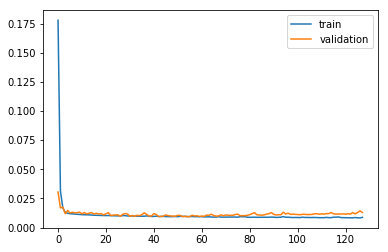

In [17]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

# Calculate and compare model accuracy

In [9]:
MAE = lambda p,o: sum(abs(p - o)) / len(o)
RMSE = lambda p,o: math.sqrt(sum((p - o) ** 2) / len(o))

In [10]:
originals = df.iloc[:,92].values
predictions = df.iloc[:,95].values

## Baseline accuracy

Baseline accuracy is calculated by predicting mood of t+1 with mood of time t. Both MAE and RMSE are showed.

In [11]:
print('MAE: {}'.format(MAE(predictions, originals)))
print('RMSE: {}'.format(RMSE(predictions, originals)))

MAE: 0.550179943390397
RMSE: 0.7529954803412126


Check how to statistically define a confidence interval for RMSE baseline value. Two approaches can be considered.

- Use assumptions that predictions - originals are normal distributed

\begin{equation}
H← ​​​60 ​+​ \frac{​​30(B−R)​​}{Vmax−Vmin}  ​​, if V​max​​ = G
\end{equation}

- Use bootstrap to estimate confidence interval of RMSE

In [12]:
x = (predictions - originals)
np.mean(x)

0.0075314010565107692

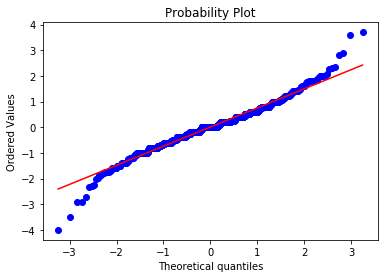

In [13]:
import scipy.stats as stats
stats.probplot(x, dist="norm", plot=pyplot)
pyplot.show()

(array([   2.,    3.,   14.,   89.,  377.,  509.,  140.,   40.,    5.,    2.]),
 array([-4.  , -3.23, -2.46, -1.69, -0.92, -0.15,  0.62,  1.39,  2.16,
         2.93,  3.7 ]),
 <a list of 10 Patch objects>)

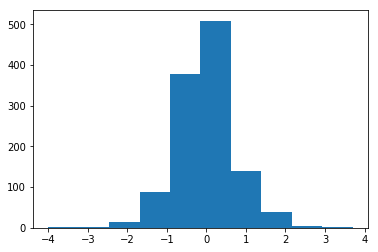

In [14]:
pyplot.hist(x)

## Model accuracy

Prediction of values with model for test set and then scale values back.

In [15]:
#make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

inverse = np.concatenate((test_X.reshape((test_X.shape[0], 95)), testPredict), axis=1)
inverse2 = scaler.inverse_transform(inverse)
testPrediction = inverse2[:,-1]

inverse = np.concatenate((test_X.reshape((test_X.shape[0], 95)), test_y.reshape((len(test_y), 1))), axis=1)
inverse2 = scaler.inverse_transform(inverse)
testY = inverse2[:,-1]

#invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform(train_y)
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform(test_y)
original = test_y[np.newaxis].T

In [16]:
print('MAE: {}'.format(MAE(testPrediction, testY)))
print('RMSE: {}'.format(RMSE(testPrediction, testY)))

MAE: 0.4864170495739381
RMSE: 0.6574642485677084
